In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1.Загрузка данных

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
data.shape

(5110, 12)

# 2. Описание задачи

Текущий датасет состоит из данных о 5110 пациентах и содержит 12 признаков:

1. `id`: уникальный идентификатор
2. `gender`: пол ("Male" - мужской, "Female" - женский, "Other" - другой)
3. `age`: возраст
4. `hypertension`: 0 - есть гипертония, 1 - нет гипертонии
5. `heart_disease`: 0 - нет сердечных заболеваний, 1 - есть сердечных заболевания
6. `ever_married`: был ли когда-либо в браке ("Yes" - да, "No" - нет)
7. `work_type`: тип работы ("children" - несовершеннолетний, "Govt_jov" - госслужащий, "Never_worked" - никогда не работал, "Private" - работает на частную компанию, "Self-employed" - самозанятый)
8. `Residence_type`: место жительства ("Rural" - в деревне, "Urban" - в городе)
9. `avg_glucose_level`: средний уровень глюкозы в крови
10. `bmi`: индекс массы тела, рассчитывается по формуле $\frac{вес(в\;кг)}{(рост(в\;метрах))^2}$
11. `smoking_status`: статус курильщика ("formerly smoked" - ранее курил, "never smoked" - никогда не курил, "smokes" - курил, "Unknown" - информация не известна)
12. `stroke`: 1 - был инсульт, 0 - не было инсульта

На основе этих данных построим бинарный классификатор, который будет предсказывать есть ли у человека риск инсульта, или его нет.

Сразу после прочтения описания данных хочется понять что же за такое значение "Other" у признака `Age`.

In [4]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Оно встретилось в выборке 1 раз, поэтому смело его удалим, поскольку это выброс.

In [5]:
data = data[data['gender']!='Other']

# 3. Разбиение данных 

Разделим выборку на обучающую и тестовую в соотношении 80% и 20% соответственно.

In [6]:
X = data[data.columns[:-1]]
y = data['stroke']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=135)

In [8]:
X_train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1076,57497,Male,27.0,0,0,No,Private,Rural,69.70,27.3,never smoked
75,66159,Female,80.0,0,1,Yes,Self-employed,Rural,66.72,21.7,formerly smoked
3557,57405,Male,53.0,0,0,Yes,Self-employed,Urban,103.37,26.9,formerly smoked
316,72214,Male,61.0,0,0,Yes,Self-employed,Urban,69.15,27.7,formerly smoked
3813,57209,Male,42.0,0,0,Yes,Govt_job,Rural,68.12,32.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
4608,42841,Male,59.0,0,0,Yes,Private,Rural,69.37,26.9,formerly smoked
2070,65109,Male,47.0,0,0,Yes,Private,Urban,71.42,34.9,smokes
2232,42040,Female,48.0,0,0,Yes,Govt_job,Urban,128.23,49.4,never smoked
459,48272,Female,11.0,0,0,No,children,Rural,87.51,24.4,Unknown


# 4. Визуализация данных

Визуализируем данные из обучающей выборки:

Рассмотрим признак "id".

Признак "id", среднее - 36608.831416687055, разброс - 21195.56989481856


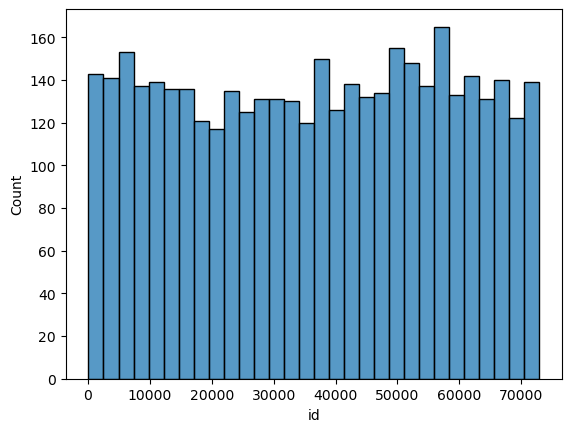

In [9]:
mean = X_train['id'].mean()
std = X_train['id'].std()
print(f'Признак "id", среднее - {mean}, разброс - {std}')
sns.histplot(data=X_train, x="id", bins=30)
plt.show()

Как видно из графика, распределение данного признака равномерное, характеризуется высоким разбросом. По смыслу это всего лишь номер идентификатора пациента, и логично предположить, что от него не зависит склонность к инсульту. Исключим данный признак из обучающей и тестовой выборок.

In [10]:
X_train = X_train.drop(columns='id')
X_test = X_test.drop(columns='id')

Рассмотрим признак "gender":

In [11]:
X_train['gender'].value_counts()

Female    2388
Male      1699
Name: gender, dtype: int64

Визуализируем распределение полов:

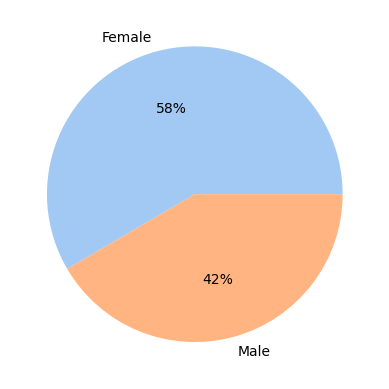

In [12]:
gender = X_train['gender'].value_counts()
plt.pie(gender, labels=['Female', 'Male'], colors = sns.color_palette('pastel')[ 0:2 ], autopct='%.0f%%')
plt.show()

Хотя количество женщин преобладает над количеством мужчин, их распределение относительно сбалансированное.

Визуализируем признак `age`.

Признак "age", среднее - 43.362896990457564, разброс - 22.574248030246416


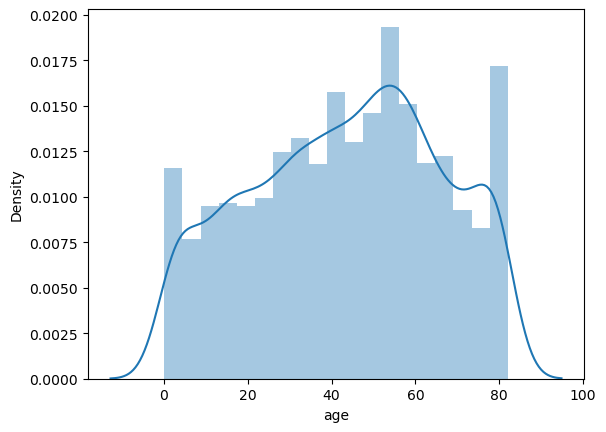

In [13]:
mean = X_train['age'].mean()
std = X_train['age'].std()
print(f'Признак "age", среднее - {mean}, разброс - {std}')
sns.distplot(X_train['age'])
plt.show()

Можно сказать, что в нашем случае распределение не похоже на нормальное.

Визуализируем признак `hypertension`.

In [14]:
X_train['hypertension'].value_counts()

0    3685
1     402
Name: hypertension, dtype: int64

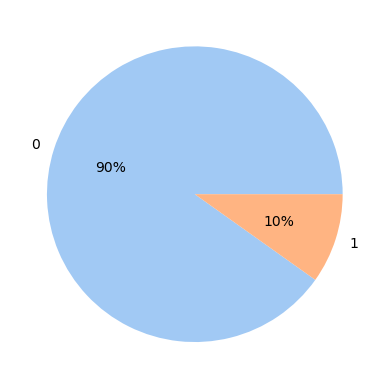

In [15]:
hypertension = X_train['hypertension'].value_counts()
plt.pie(hypertension, labels=['0', '1'], colors = sns.color_palette('pastel')[ 0:2 ], autopct='%.0f%%')
plt.show()

Только у 10% есть гипертония.

Визуализируем признак `heart_disease`.

In [16]:
X_train['heart_disease'].value_counts()

0    3857
1     230
Name: heart_disease, dtype: int64

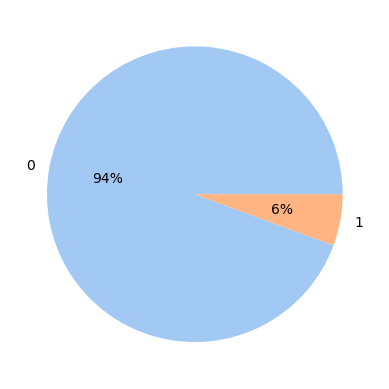

In [17]:
heart_disease = X_train['heart_disease'].value_counts()
plt.pie(heart_disease, labels=['0', '1'], colors = sns.color_palette('pastel')[ 0:2 ], autopct='%.0f%%')
plt.show()

Сердечные заболевания всего у 6% пациентов.

Исследуем признак `ever_married`.

In [18]:
X_train['ever_married'].value_counts()

Yes    2703
No     1384
Name: ever_married, dtype: int64

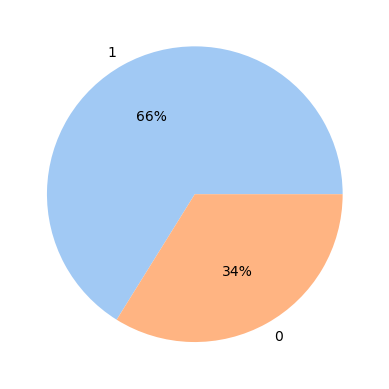

In [19]:
ever_married = X_train['ever_married'].value_counts()
plt.pie(ever_married, labels=['1', '0'], colors = sns.color_palette('pastel')[ 0:2 ], autopct='%.0f%%')
plt.show()

66% пациентов когда-либо состояли в браке.

Проанализируем признак `work_type`.

In [20]:
X_train['work_type'].value_counts()

Private          2354
Self-employed     656
children          541
Govt_job          521
Never_worked       15
Name: work_type, dtype: int64

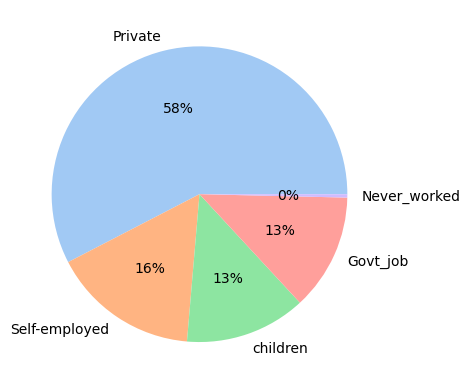

In [21]:
work_type = X_train['work_type'].value_counts()
plt.pie(work_type, labels=['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked'], colors = sns.color_palette('pastel')[ 0:5], autopct='%.0f%%')
plt.show()

Большинство людей работают в частных компаниях. Ни разу не работавших практически нет.

Проанализируем признак `Residence_type`.

In [22]:
X_train['Residence_type'].value_counts()

Urban    2109
Rural    1978
Name: Residence_type, dtype: int64

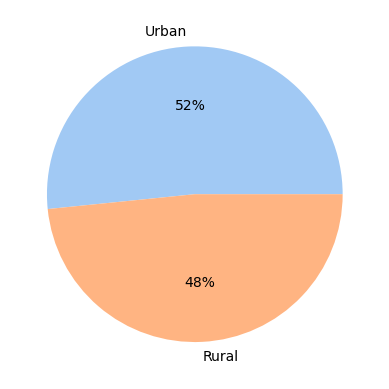

In [23]:
Residence_type = X_train['Residence_type'].value_counts()
plt.pie(Residence_type, labels=['Urban', 'Rural'], colors = sns.color_palette('pastel')[ 0:2], autopct='%.0f%%')
plt.show()

В выборке практически одинаковое количество сельских и городских жителей.

Исследуем распределение `avg_glucose_level`.

Признак "avg_glucose_level", среднее - 106.33856863224867, разброс - 45.34433611436057


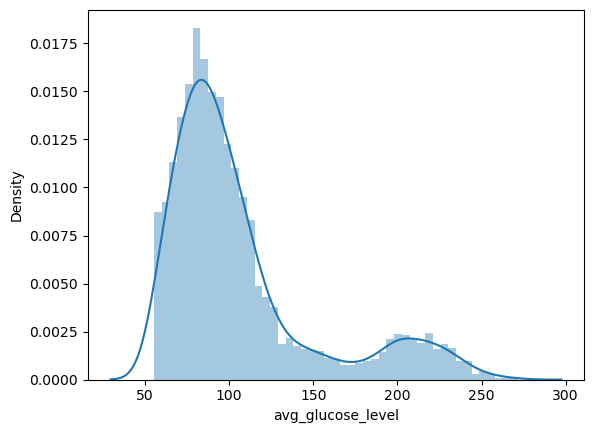

In [24]:
mean = X_train['avg_glucose_level'].mean()
std = X_train['avg_glucose_level'].std()
print(f'Признак "avg_glucose_level", среднее - {mean}, разброс - {std}')
sns.distplot(X_train['avg_glucose_level'])
plt.show()

У распределения среднего уровня глюкозы в крови тяжелый правый хвост.

Исследуем признак `bmi`.

Признак "bmi", среднее - 28.92677707006376, разброс - 7.947048185000761


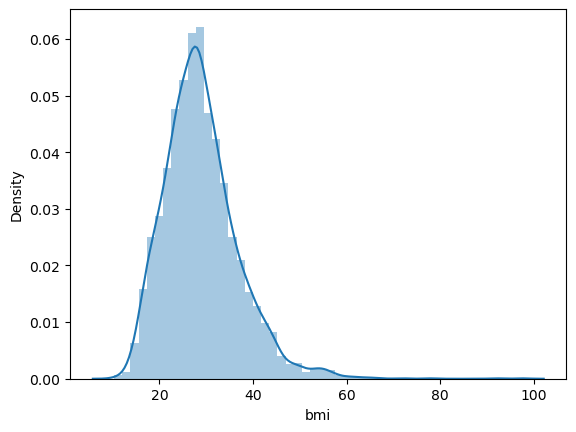

In [25]:
mean = X_train['bmi'].mean()
std = X_train['bmi'].std()
print(f'Признак "bmi", среднее - {mean}, разброс - {std}')
sns.distplot(X_train['bmi'])
plt.show()

Исследуем признак `smoking_status`.

In [26]:
X_train['smoking_status'].value_counts()

never smoked       1504
Unknown            1233
formerly smoked     713
smokes              637
Name: smoking_status, dtype: int64

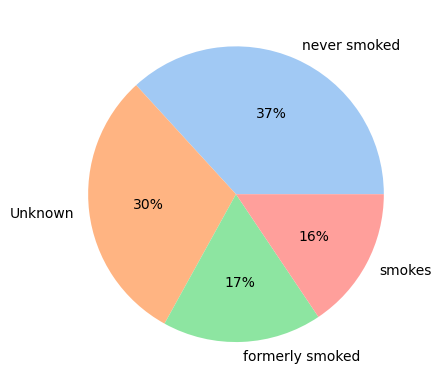

In [27]:
smoking_status = X_train['smoking_status'].value_counts()
plt.pie(smoking_status, labels=['never smoked', 'Unknown', 'formerly smoked', 'smokes'], colors = sns.color_palette('pastel')[ 0:4], autopct='%.0f%%')
plt.show()

Построим корреляционную матрицу признаков.

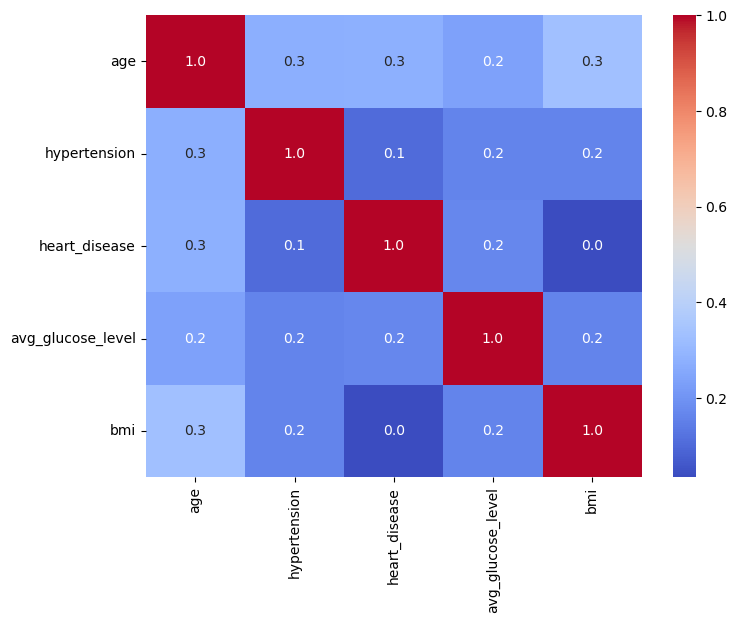

In [28]:
plt.figure(figsize=(8, 6))
corr_mat = X_train.corr()
sns.heatmap(corr_mat, annot=True, fmt=".1f", cmap='coolwarm')
plt.show()

Можно заметить, что числовые признаки некореллированные. 

# 5. Обработка пропущенных значений

Исследуем датасеты на пропуски.

In [29]:
X_train.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  162
smoking_status         0
dtype: int64

In [30]:
X_test.isnull().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  39
smoking_status        0
dtype: int64

Пропуски есть только у признака `bmi`.

In [75]:
print(f'{round(162/X_train.shape[0]*100,2)}% - доля пропусков в обучающей выборке')
print(f'{round(39/X_test.shape[0]*100,2)}% - доля пропусков в тестовой выборке')

3.96% - доля пропусков в обучающей выборке
3.82% - доля пропусков в тестовой выборке


Доля пропусков в обучающей и тестовой выборке не столь значительна. Поэтому сохраним признак `bmi` и заменим пропуски на медианные значения.

In [32]:
bmi_median_train = np.nanmedian(X_train['bmi'])
X_train['bmi'] = X_train['bmi'].fillna(bmi_median_train)
bmi_median_test = np.nanmedian(X_test['bmi'])
X_test['bmi'] = X_test['bmi'].fillna(bmi_median_test)

# 6. Борьба с выбросами

Построим box plot для числовых признаков.

Для `age`:

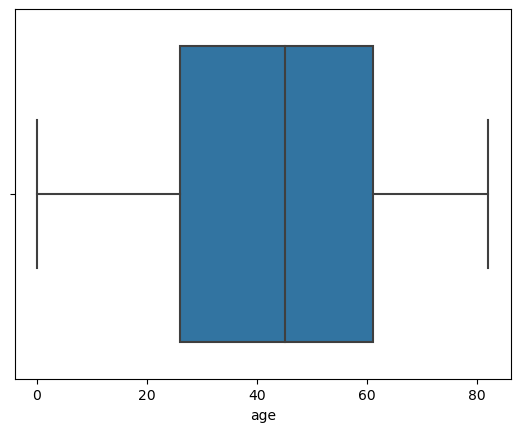

In [33]:
sns.boxplot(x=X_train['age'])
plt.show()

Для `bmi`:

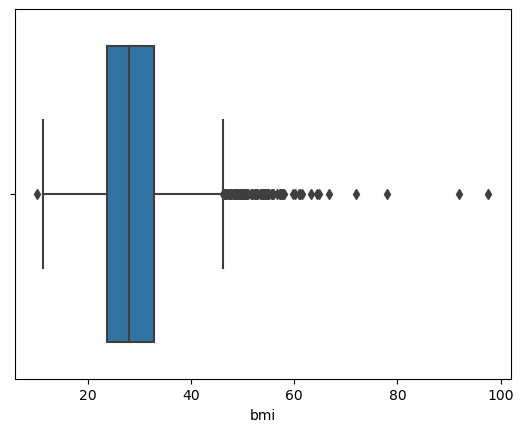

In [34]:
sns.boxplot(x=X_train['bmi'])
plt.show()

Для `avg_glucose_level`:

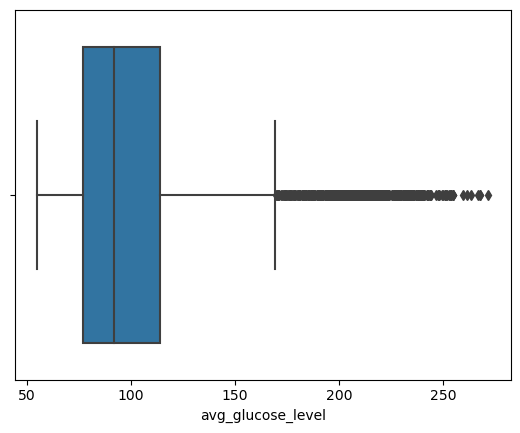

In [35]:
sns.boxplot(x=X_train['avg_glucose_level'])
plt.show()

Построим таблицу квантилей.

In [36]:
X_train[['age', 'bmi', 'avg_glucose_level']].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,age,bmi,avg_glucose_level
0.005,0.6744,14.300,55.8115
0.010,1.1488,15.100,56.3658
0.050,5.0000,17.700,60.9460
0.100,11.0000,19.800,65.8280
0.500,45.0000,28.000,92.1500
0.900,75.0000,38.800,192.7880
0.950,79.0000,42.870,216.3230
0.990,82.0000,53.814,239.6652
0.995,82.0000,56.342,248.1239


Изучим данные, у которых `"age"`, `"bmi"`, `"avg_glucose_level"` не лежат в пределах квантилей 0.005 и 0.995.

In [37]:
rows = (X_train['age'] <= X_train['age'].quantile(0.005)) | (X_train['age'] >= X_train['age'].quantile(0.995)) |\
(X_train['bmi'] <= X_train['bmi'].quantile(0.005)) | (X_train['bmi'] >= X_train['bmi'].quantile(0.995)) |\
(X_train['avg_glucose_level'] <= X_train['avg_glucose_level'].quantile(0.005)) | (X_train['avg_glucose_level'] >= X_train['avg_glucose_level'].quantile(0.995))

Посмотрим сколько в выборке объектов положительного класса.

In [38]:
y_train.value_counts()

0    3890
1     197
Name: stroke, dtype: int64

И сколько среди "выбросов" объектов положительного класса.

In [39]:
y_train[rows].value_counts()

0    131
1     14
Name: stroke, dtype: int64

In [40]:
print(f'{round(X_train[rows].shape[0]/X_train.shape[0]*100, 2)}% - доля выбросов в выборке')

3.55% - доля выбросов в выборке


In [41]:
print(f'Доля положительного класса в выбросах: {round(y_train[rows].sum()/y_train[rows].shape[0] * 100,2)}%')

Доля положительного класса в выбросах: 9.66%


In [42]:
print(f'Доля положительного класса в выборке: {round(y_train.sum() / y_train.shape[0] * 100,2)}%')

Доля положительного класса в выборке: 4.82%


Напомним, что поскольку решается задача медицинской диагностики, то полезной информацией является факт инсульта. В данном случае, мы не будем удалять выбросы, поскольку в них по процентному соотношению примерно в 2 раза больше полезной информации, чем в общем выборке. Логично предположить, что инсульт как раз случается при аномальном отклонении показателей от нормы, и поэтому удаление выбросов, скорее всего приведет к ошибке.

# 7. Кодирование категориальных признаков

В датасете не так много категориальных признаков, много из них бинарных. Применим к ним One-Hot Encoding. Это увеличит наше признаковое пространство, но не столь значительно. Чтобы не генерировать линейно зависимые признаки, для признака с m значениями будем генерировать m-1 новых бинарных признаков в One-Hot Encoding за счет команды drop_first=True.

In [43]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [44]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1076,27.0,0,0,69.70,27.3,1,0,0,1,0,0,0,0,1,0
75,80.0,0,1,66.72,21.7,0,1,0,0,1,0,0,1,0,0
3557,53.0,0,0,103.37,26.9,1,1,0,0,1,0,1,1,0,0
316,61.0,0,0,69.15,27.7,1,1,0,0,1,0,1,1,0,0
3813,42.0,0,0,68.12,32.0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4608,59.0,0,0,69.37,26.9,1,1,0,1,0,0,0,1,0,0
2070,47.0,0,0,71.42,34.9,1,1,0,1,0,0,1,0,0,1
2232,48.0,0,0,128.23,49.4,0,1,0,0,0,0,1,0,1,0
459,11.0,0,0,87.51,24.4,0,0,0,0,0,1,0,0,0,0


Как видно, размерность признакового пространства стала равна 15 (была равна 11 после удаления `age`).

# 8. Исключение коррелированных и нерелевантных признаков

Построим корреляционную матрицу для нового признакового пространства:

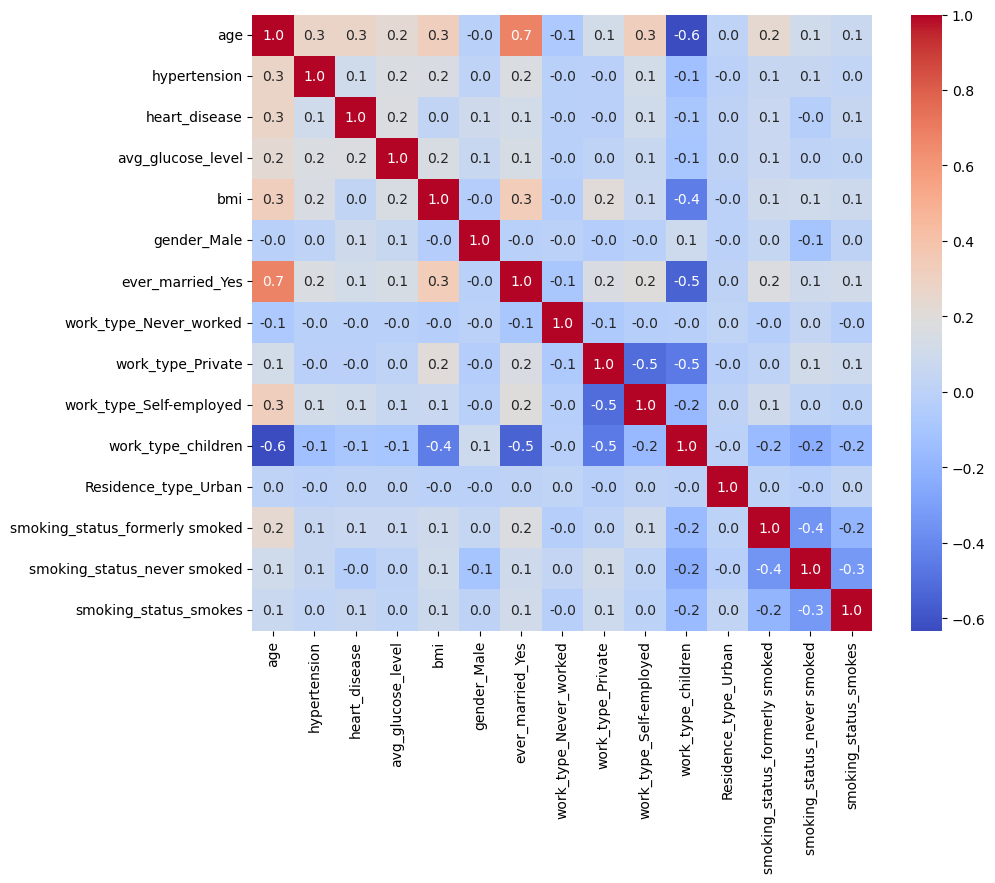

In [45]:
plt.figure(figsize=(10, 8))
corr_mat = X_train.corr()
sns.heatmap(corr_mat, annot=True, fmt=".1f", cmap='coolwarm')
plt.show()

Можно заметить, что высоко коррелирован признак `ever_married_Yes` с `age` (корреляция 0.7). С точки зрения интерпретации, нельзя сказать как связан инсульт и факт того, что человек был когда-либо в браке. Исходя из высокой коррелированности признака `ever_married_Yes` с `age`, а также его интерпретации, мы примем решение об удалении признака `ever_married_Yes`.

In [46]:
X_train = X_train.drop(columns=['ever_married_Yes'])
X_test = X_test.drop(columns=['ever_married_Yes'])

Также стоит удалить признак `work_type_children`, поскольку он несет ту же информацию, что и признак `age`.

In [47]:
X_train = X_train.drop(columns=['work_type_children'])
X_test = X_test.drop(columns=['work_type_children'])

In [48]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1076,27.0,0,0,69.70,27.3,1,0,1,0,0,0,1,0
75,80.0,0,1,66.72,21.7,0,0,0,1,0,1,0,0
3557,53.0,0,0,103.37,26.9,1,0,0,1,1,1,0,0
316,61.0,0,0,69.15,27.7,1,0,0,1,1,1,0,0
3813,42.0,0,0,68.12,32.0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4608,59.0,0,0,69.37,26.9,1,0,1,0,0,1,0,0
2070,47.0,0,0,71.42,34.9,1,0,1,0,1,0,0,1
2232,48.0,0,0,128.23,49.4,0,0,0,0,1,0,1,0
459,11.0,0,0,87.51,24.4,0,0,0,0,0,0,0,0


# 9. Масштабированние данных

Поскольку в дальнейшем мы будем работать с линейными моделями, то стоит провести стандартизацию данных.

In [49]:
from sklearn.preprocessing import StandardScaler
columns = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

Посмотрим описание получившихся данных.

In [50]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
X_train.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4087.00000,4087.00000,4087.00000,4087.00000,4087.00000,4087.00000,4087.00000,4087.00000,4087.00000,4087.00000,4087.00000,4087.00000,4087.00000
mean,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000
std,1.00012,1.00012,1.00012,1.00012,1.00012,1.00012,1.00012,1.00012,1.00012,1.00012,1.00012,1.00012,1.00012
min,-1.91759,-0.33029,-0.24420,-1.12726,-2.38669,-0.84349,-0.06069,-1.16548,-0.43726,-1.03258,-0.45970,-0.76307,-0.42969
25%,-0.76924,-0.33029,-0.24420,-0.64324,-0.65349,-0.84349,-0.06069,-1.16548,-0.43726,-1.03258,-0.45970,-0.76307,-0.42969
50%,0.07253,-0.33029,-0.24420,-0.31295,-0.11427,-0.84349,-0.06069,0.85802,-0.43726,0.96844,-0.45970,-0.76307,-0.42969
75%,0.78139,-0.33029,-0.24420,0.17405,0.50198,1.18555,-0.06069,0.85802,-0.43726,0.96844,-0.45970,1.31050,-0.42969
max,1.71177,3.02765,4.09507,3.64812,8.82134,1.18555,16.47625,0.85802,2.28696,0.96844,2.17534,1.31050,2.32723


Видно, что стандартизация прошла успешно.

# 10. Повторная визуализация

Посмотрим на матрицу корреляций.

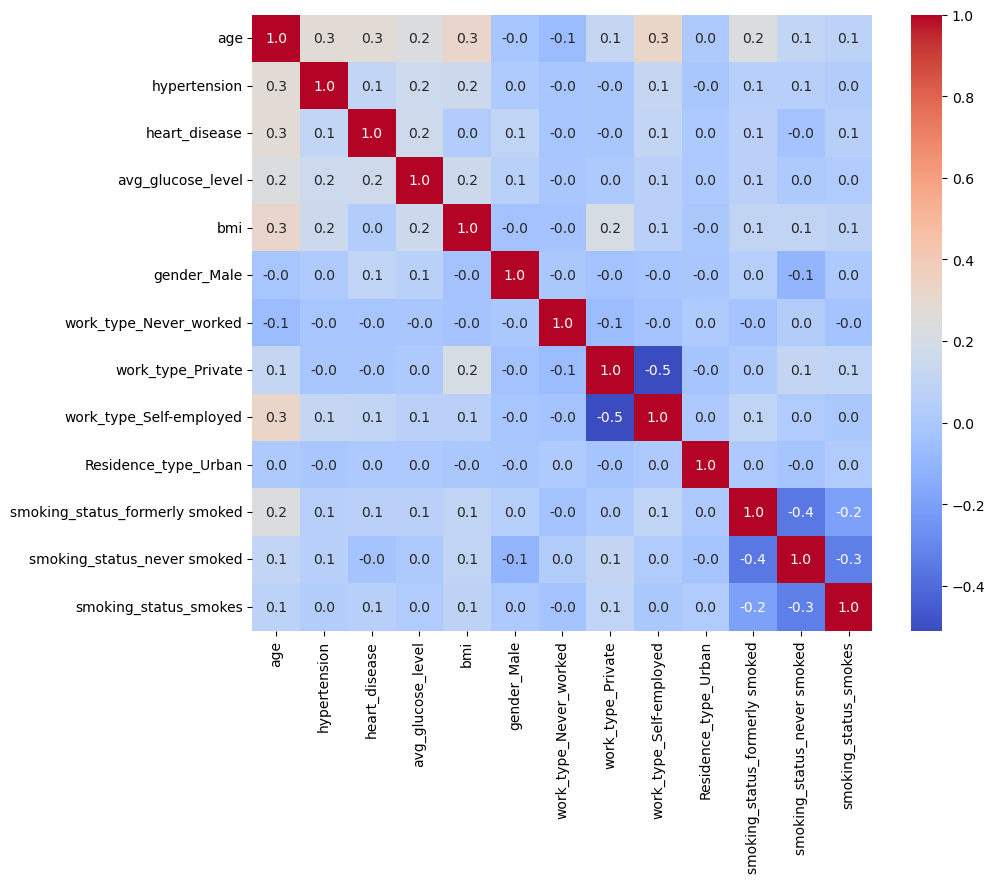

In [51]:
plt.figure(figsize=(10, 8))
corr_mat = X_train.corr()
sns.heatmap(corr_mat, annot=True, fmt=".1f", cmap='coolwarm')
plt.show()

Прослеживаются те же показатели, что были и до стандартизации.

Посмотрим как выглядят распределения числовых признаков теперь.

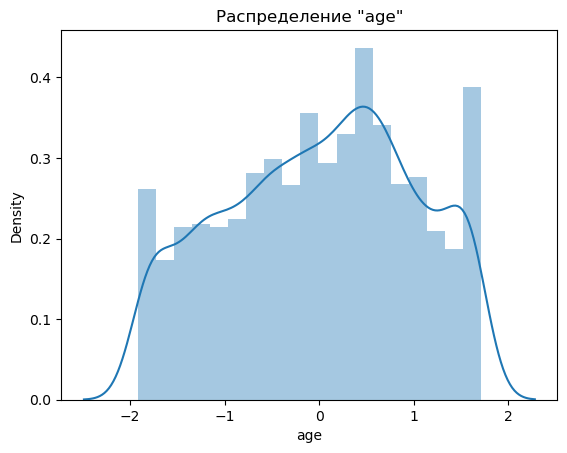

In [52]:
sns.distplot(X_train['age']).set_title('Распределение "age"')
plt.show()

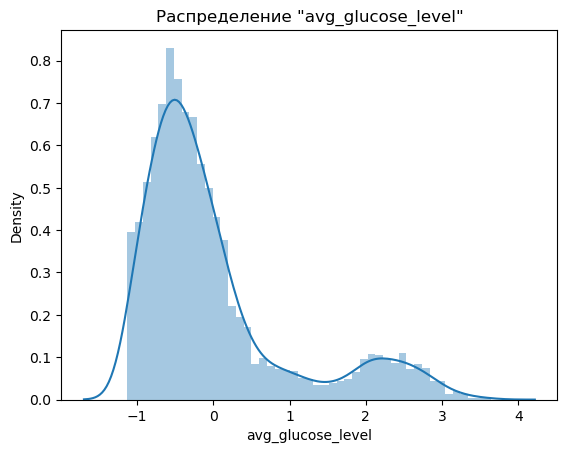

In [53]:
sns.distplot(X_train['avg_glucose_level']).set_title('Распределение "avg_glucose_level"')
plt.show()

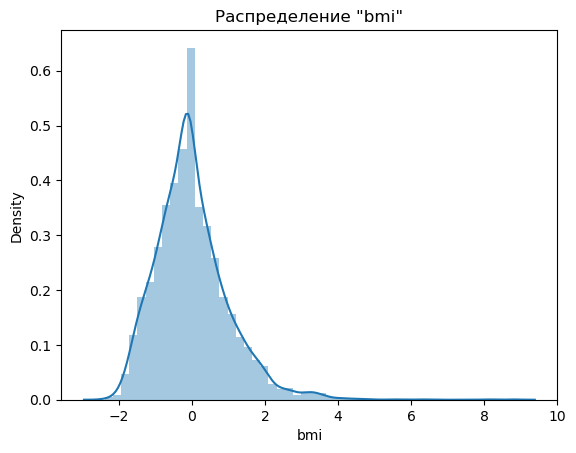

In [54]:
sns.distplot(X_train['bmi']).set_title('Распределение "bmi"')
plt.show()

Есть смысл посмотреть как зависят числовые признаки друг от друга.

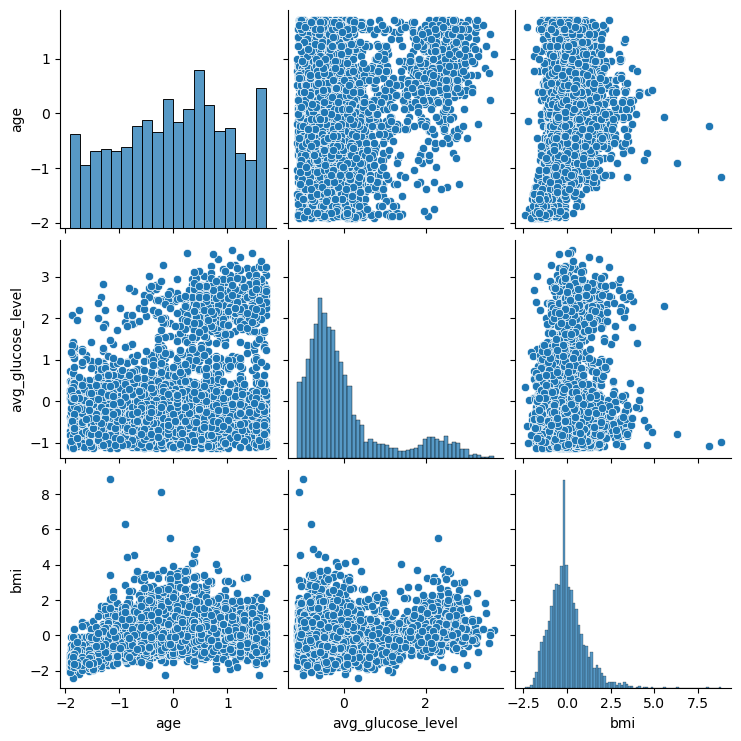

In [55]:
sns.pairplot(X_train[['age', 'avg_glucose_level', 'bmi']])
plt.show()

# 11. Баланс классов

Сначала взгляем на баланс классов в выборках.

In [56]:
y_train.value_counts()

0    3890
1     197
Name: stroke, dtype: int64

In [78]:
print(f'{round(y_train.sum()/y_train.shape[0] * 100,2)}% - доля положительного класса в обучающей выборке')

4.82% - доля положительного класса в обучающей выборке


In [57]:
y_test.value_counts()

0    970
1     52
Name: stroke, dtype: int64

Виден явный дизбаланс положительного класса. Будем применять метод балансировки OverSampling.

In [58]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_balanced, y_train_balanced = oversample.fit_resample(X_train, y_train)

# 12. Выбор методов машинного обучения и метрик

Попробуем для решения задачи различные алгоритмы: логистическую регрессию, SVM, kNN, RandomForest, XGBoost. Будем использовать метрики качества precision, recall, AUC-PR, f1-score, а также будем смотреть на confusion matrix, PR-кривую. Метрику AUC-ROC нет смысла использовать поскольку в тестовой выборке дизбаланс классов.

Поскольку решается задача медицинской диагностики, то мы потребуем $recall\geq0.8$ и при этом $precision\to max$.

In [60]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import ConfusionMatrixDisplay

Создадим функцию для подсчета метрик.

In [61]:
def calculate_metrics(y_proba, y_true):
    
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    PrecisionRecallDisplay.from_predictions(y_true, y_proba)
    plt.show()
    
    # выбираем порог, такой что recall>=0.8 и precision -> max
    best_threshold = 0
    max_precision = 0
    for i, x in enumerate(recall):
        if x >= 0.8 and precision[i] >= max_precision:
            best_threshold = thresholds[i]
            max_precision = precision[i]
    
    y_pred = y_proba >= best_threshold
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    plt.show()
    
    print('Качество на тестовой выборке:')
    pr = precision_score(y_true, y_pred)
    print(f'precision_score = {round(pr,3)}')
    rec = recall_score(y_true, y_pred)
    print(f'recall_score = {round(rec,3)}')
    f1 = f1_score(y_pred, y_true)
    print(f'f1_score = {round(f1,3)}')
    auc_pr = auc(recall, precision)
    print(f'auc_precision_recall = {round(auc_pr,3)}')

    return [pr, rec, f1, auc_pr]

# 13. Логистическая регрессия

Начнем с логистической регрессии. Обучим модель.

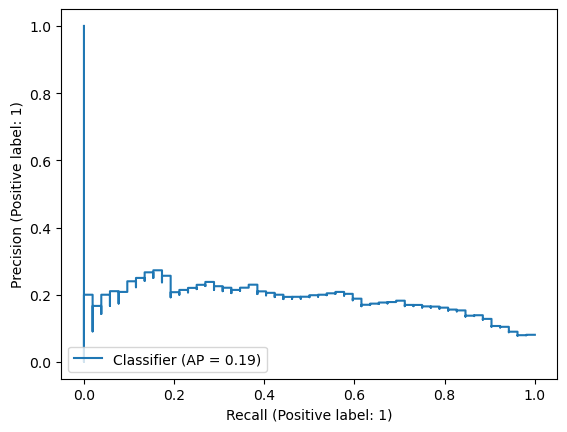

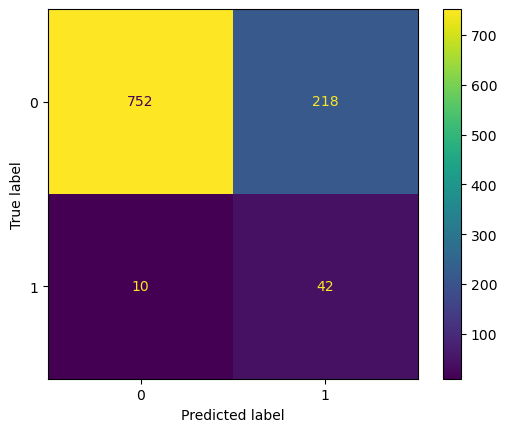

Качество на тестовой выборке:
precision_score = 0.162
recall_score = 0.808
f1_score = 0.269
auc_precision_recall = 0.18


In [62]:
from sklearn.linear_model import LogisticRegression
linear_clf = LogisticRegression(random_state=135, C=1)
linear_clf.fit(X_train_balanced, y_train_balanced)
linear_clf_metrics = calculate_metrics(linear_clf.predict_proba(X_test)[:, 1], y_test)

# 14. SVM

Обучим SVM с линейным ядром.

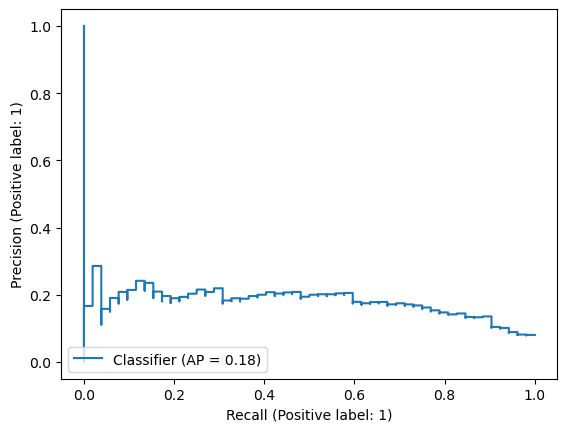

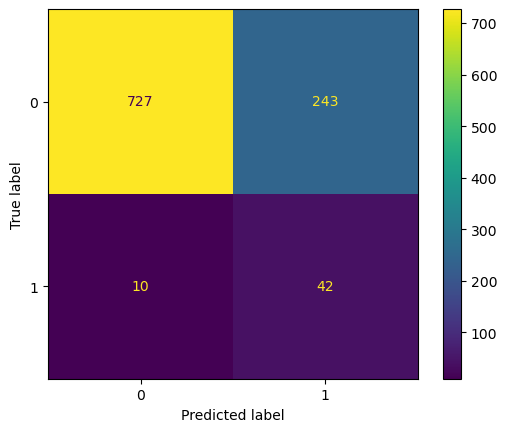

Качество на тестовой выборке:
precision_score = 0.147
recall_score = 0.808
f1_score = 0.249
auc_precision_recall = 0.172


In [63]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', probability=True, random_state=135, C=1)
svc.fit(X_train_balanced, y_train_balanced)
svc_metrics = calculate_metrics(svc.predict_proba(X_test)[:, 1], y_test)

# 15. kNN

Мы знаем, что kNN сильно зависит от количества ближайших соседей, которые используются в алгоритме для определения класса. Настроим этот гиперпараметр по кросс-валидации. Построим график зависимости f1-score в завимости от количества ближайших соседей.

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

Сделаем кросс-валидацию с 10 блоками разбиения. Попробуем количество ближайших соседей из диапазона: `range(1,350,5)`.

In [65]:
k_train_error = []
k_validation_error = []
k_neighbours = [i for i in range(1,350,5)]
kf = KFold(n_splits=10)

for k in k_neighbours:
    
    train_error = []
    validation_error = []
    
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):

        oversample = RandomOverSampler(sampling_strategy='minority')
        X_oversample, y_oversample = oversample.fit_resample(X_train.iloc[train_index], y_train.iloc[train_index])

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_oversample, y_oversample)

        proba_train = knn.predict_proba(X_train.iloc[train_index])
        proba_test = knn.predict_proba(X_train.iloc[test_index])
        
        #выбираем для классификатора threshold такой, что recall>=0.8 и precision -> max
        precision, recall, thresholds = precision_recall_curve(y_train.iloc[train_index], proba_train[:,1])
        best_threshold = 0
        max_precision = 0
        for i, x in enumerate(recall):
            if x >= 0.8 and precision[i] >= max_precision:
                best_threshold = thresholds[i]
                max_precision = precision[i]
    
        y_pred_train = proba_train >= best_threshold
        y_pred_test = proba_test >= best_threshold

        train_error.append(f1_score(y_train.iloc[train_index], y_pred_train[:, 1]))
        validation_error.append(f1_score(y_train.iloc[test_index], y_pred_test[:, 1]))

    k_train_error.append(np.mean(train_error))
    k_validation_error.append(np.mean(validation_error))

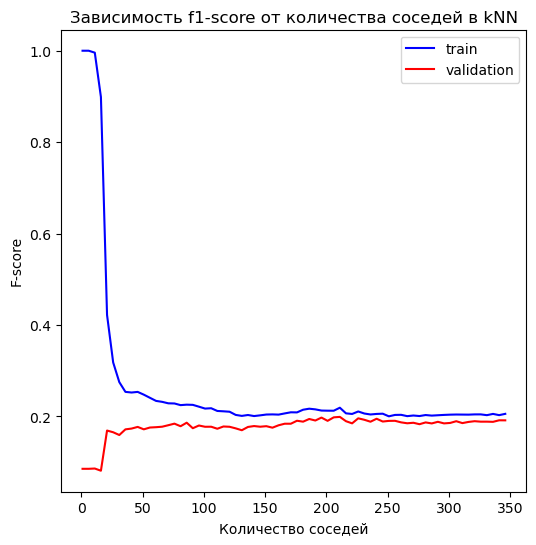

In [76]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(k_neighbours, k_train_error, label="train", color='blue')
ax.plot(k_neighbours, k_validation_error, label="validation", color='red')
ax.set_xlabel('Количество соседей')
ax.set_ylabel('F-score')
ax.set_title('Зависимость f1-score от количества соседей в kNN')

ax.legend()
plt.show()

In [67]:
print(f'Лучшее k по итогам кросс-валидации: {k_neighbours[np.argmax(k_validation_error)]}')

Лучшее k по итогам кросс-валидации: 211


Обучим модель с k=211.

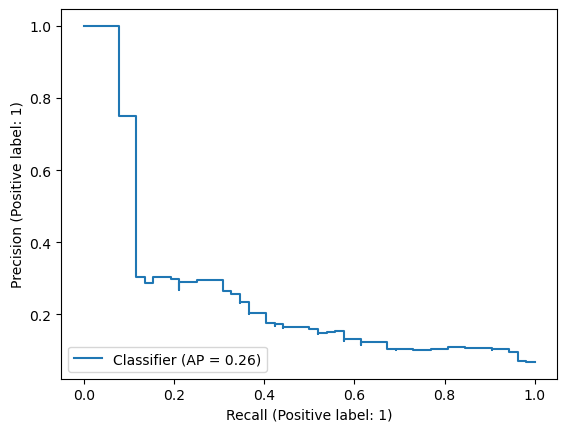

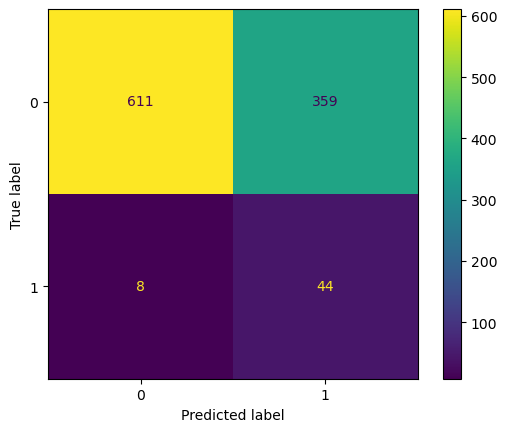

Качество на тестовой выборке:
precision_score = 0.109
recall_score = 0.846
f1_score = 0.193
auc_precision_recall = 0.262


In [79]:
kNN = KNeighborsClassifier(n_neighbors=211)
kNN.fit(X_train_balanced, y_train_balanced)
kNN_metrics = calculate_metrics(kNN.predict_proba(X_test)[:, 1], y_test)

# 16. RandomForest

С помощью метода GridSearchCV подберем параметры для RandomForestClassifier.

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(class_weight='balanced')
rf_clf = GridSearchCV(rf, {'n_estimators': range(50,500, 50), 'max_depth': range(1,10)})
rf_clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': range(1, 10),
                         'n_estimators': range(50, 500, 50)})

In [70]:
rf_clf.best_params_

{'max_depth': 9, 'n_estimators': 50}

Подобрали параметры: 50 деревьев глубины 9.

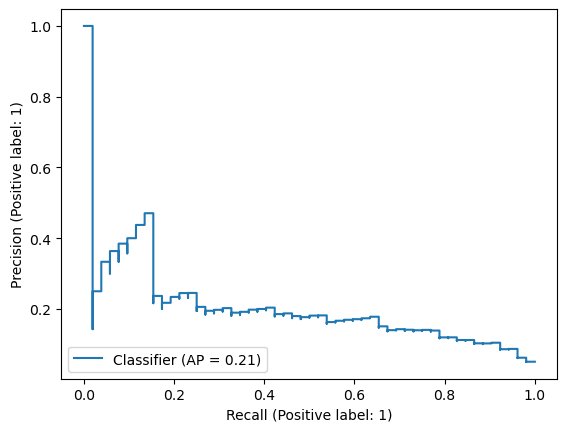

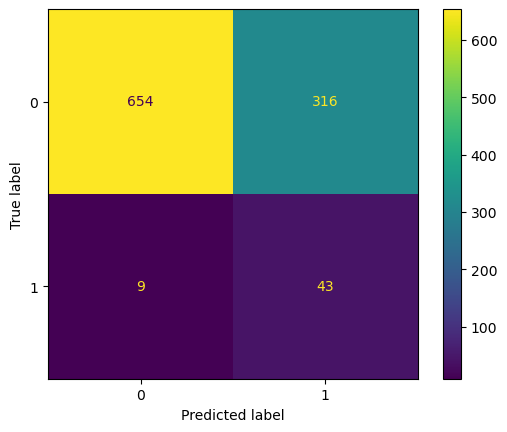

Качество на тестовой выборке:
precision_score = 0.12
recall_score = 0.827
f1_score = 0.209
auc_precision_recall = 0.2


In [71]:
rf_metrics = calculate_metrics(rf_clf.predict_proba(X_test)[:, 1], y_test)

# 17. XGBoost

Будем использовать в XGBoost деревья глубины 2. Подберем гиперпараметр количество деревьев среди чисел `[1,2,3,4,5,6,7,8,9,10,15,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,110,120]`.

In [72]:
from xgboost import XGBClassifier
xg_train_error = []
xg_validation_error = []
n_estimators = [1,2,3,4,5,6,7,8,9,10,15,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,110,120]
kf = KFold(shuffle=True, random_state=135, n_splits=10)

for k in n_estimators:
    
    train_error = []
    validation_error = []
    
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):

        oversample = RandomOverSampler(sampling_strategy='minority')
        X_oversample, y_oversample = oversample.fit_resample(X_train.iloc[train_index], y_train.iloc[train_index])

        xg = XGBClassifier(n_estimators=k, max_depth=2)
        xg.fit(X_oversample, y_oversample)

        proba_train = xg.predict_proba(X_train.iloc[train_index])
        proba_test = xg.predict_proba(X_train.iloc[test_index])
        
        #выбираем для классификатора threshold такой, что recall>=0.8 и precision -> max
        precision, recall, thresholds = precision_recall_curve(y_train.iloc[train_index], proba_train[:,1])
        best_threshold = 0
        max_precision = 0
        for i, x in enumerate(recall):
            if x >= 0.8 and precision[i] >= max_precision:
                best_threshold = thresholds[i]
                max_precision = precision[i]
    
        y_pred_train = proba_train >= best_threshold
        y_pred_test = proba_test >= best_threshold

        train_error.append(f1_score(y_train.iloc[train_index], y_pred_train[:, 1]))
        validation_error.append(f1_score(y_train.iloc[test_index], y_pred_test[:, 1]))

    xg_train_error.append(np.mean(train_error))
    xg_validation_error.append(np.mean(validation_error))

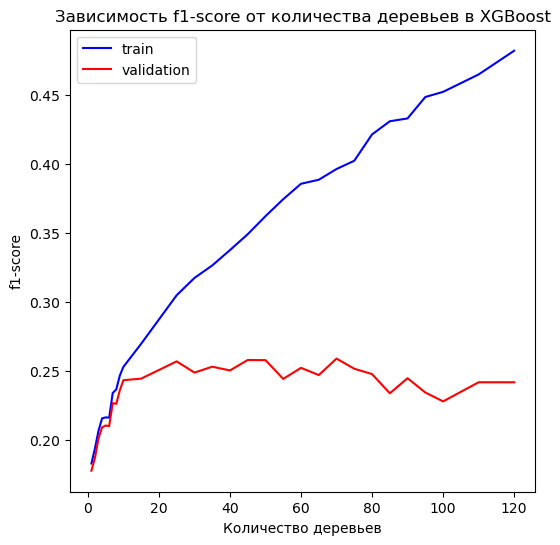

In [86]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(n_estimators, xg_train_error, label="train", color='blue')
ax.plot(n_estimators, xg_validation_error, label="validation", color='red')
ax.set_xlabel('Количество деревьев')
ax.set_ylabel('f1-score')
ax.set_title('Зависимость f1-score от количества деревьев в XGBoost')
ax.legend()
plt.show()

Из кривых видно, что лучше всего выбрать 30 деревьев. Если взять меньше деревьев, то мы недообучимся, если взять больше деревьев то переобучимся.

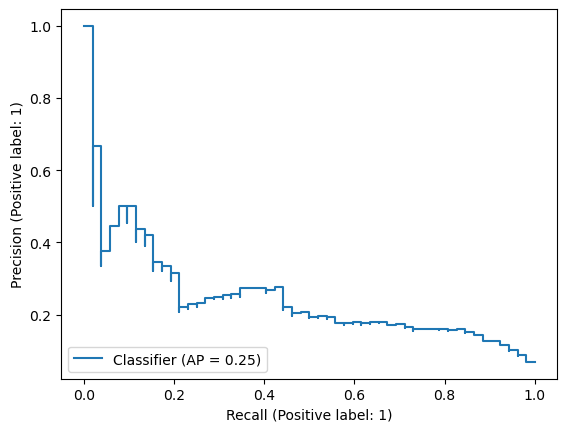

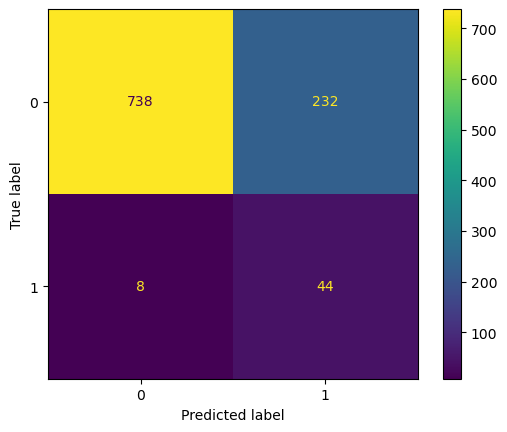

Качество на тестовой выборке:
precision_score = 0.159
recall_score = 0.846
f1_score = 0.268
auc_precision_recall = 0.244


In [74]:
boosting = XGBClassifier(n_estimators=30, max_depth=2)
boosting.fit(X_train_balanced, y_train_balanced)
boosting_metrics = calculate_metrics(boosting.predict_proba(X_test)[:, 1], y_test)

# 18. Анализ результатов

In [84]:
def print_res(name, results):
    print(f'Алгоритм {name}, качество на тестовой выборке:')
    pr = results[0]
    print(f'precision_score = {round(pr,3)}')
    rec = results[1]
    print(f'recall_score = {round(rec,3)}')
    f1 = results[2]
    print(f'f1_score = {round(f1,3)}')
    auc_pr = results[3]
    print(f'auc_precision_recall = {round(auc_pr,3)}')
    print()

Достанем результаты экспериментов.

In [85]:
print_res('LogisticRegression', linear_clf_metrics)
print_res('SVM', svc_metrics)
print_res('kNN', kNN_metrics)
print_res('RandomForest', rf_metrics)
print_res('XGBoost', boosting_metrics)

Алгоритм LogisticRegression, качество на тестовой выборке:
precision_score = 0.162
recall_score = 0.808
f1_score = 0.269
auc_precision_recall = 0.18

Алгоритм SVM, качество на тестовой выборке:
precision_score = 0.147
recall_score = 0.808
f1_score = 0.249
auc_precision_recall = 0.172

Алгоритм kNN, качество на тестовой выборке:
precision_score = 0.109
recall_score = 0.846
f1_score = 0.193
auc_precision_recall = 0.262

Алгоритм RandomForest, качество на тестовой выборке:
precision_score = 0.12
recall_score = 0.827
f1_score = 0.209
auc_precision_recall = 0.2

Алгоритм XGBoost, качество на тестовой выборке:
precision_score = 0.159
recall_score = 0.846
f1_score = 0.268
auc_precision_recall = 0.244



Составим сравнительную таблицу:

| Algorithm | precision | recall | f1-score | AUC-PR
| --- | --- | --- | --- | --- |
| LogisticRegression | 0.162  | 0.808  | 0.269 |  0.18 |
| SVM | 0.147 | 0.808 | 0.249 | 0.172 |
| kNN | 0.109 | 0.846 | 0.193 | 0.262 |
| RandomForest | 0.12 | 0.827 | 0.209 | 0.2 |
| XGBoost | 0.159 | 0.846 | 0.268 | 0.244 |


Напомним, что нами ставилась цель сделать $recall\geq0.8$ и при этом $precision\to max$. Как можно заметить из таблицы, максимальный f1-score($0.269$) получен у логистической регрессии. Затем идет XGBoost с f1-score $0.268$. У остальных алгоритмов f1-score значительно меньше. Хуже всего себя проявляет kNN (f1-score=$0.193$), хотя казалось бы по показателям AUC-PR, он является лучшим алгоритмом. Проблема этой задачи заключается в том, что AUC-PR под всей кривой нельзя никак трактовать. По условию задачи мы требуем $recall \geq 0.8$ и поэтому нас должна интересовать площадь под PR-кривой при $recall \geq 0.8$. Это хороший пример, когда неправильная трактовка AUC-PR может привести к неверному выбору алгоритма. 